## Количество рейсов по городам прибытия и по моделям самолетов

<font color='purple'>_Исследование посвящено объему пассажирских авиаперевозок в августе-сентябре 2018 года. В нашем распоряжении данные по среднему количеству рейсов, выполнявшихся ежедневно в 101 город России в августе 2018, а также данные о распределении по моделям самолетов рейсов, выполненных в сентябре 2018 года. Цель проекта - визуализировать эти данные и сделать предварительные выводы о наиболее популярных направлениях полетов и количестве летающих пассажиров._

План проекта:
    
1. Выгрузка и изучение таблиц
2. Создание таблицы Топ-10 городов прибытия
3. Модели самолетов и количество рейсов в сентябре 2018.
4. Ежедневное количество рейсов по городам прибытия в августе 2018.
5. Топ-10 городов прибытия по количеству рейсов в августе 2018.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt

### <font color='purple'> 1. Выгрузка и изучение таблиц

In [2]:
models_flights = pd.read_csv('query_1.csv')
cities_flights = pd.read_csv('query_3.csv')

In [3]:
print(models_flights.info())
print()
print(cities_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


In [4]:
display(models_flights)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
# Приведем данные к типу float32
cities_flights.average_flights = cities_flights.average_flights.astype(np.float32)
# Округилим значения в столбце average_flights до второго знака после точки
cities_flights = np.round(cities_flights, 2)
display(cities_flights.head())
print()
print(cities_flights.dtypes)

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45



city                object
average_flights    float32
dtype: object


С типами данных все в порядке, пропусков нет. В таблице про города окргуглили значения столбца average_flights до второго знака после точки и перевели данные к типу float32.

### <font color= 'purple'>2. Создание таблицы топ-10 городов прибытия

In [6]:
# Создадим таблицу для десяти городов, куда больше всего летади в сентябре 2018.

top_ten_cities = cities_flights.sort_values(by = 'average_flights', ascending = False).head(10).reset_index(drop=True)
display(top_ten_cities)

,city,average_flights
0,Москва,129.770004
1,Санкт-Петербург,31.160000
2,Новосибирск,17.320000
3,Красноярск,11.580000
4,Екатеринбург,11.320000
5,Ростов-на-Дону,10.190000
6,Пермь,10.130000
7,Брянск,10.000000
8,Сочи,9.610000
9,Ульяновск,9.580000


### <font color='purple'>3. Модели самолетов и количество рейсов в сентябре 2018

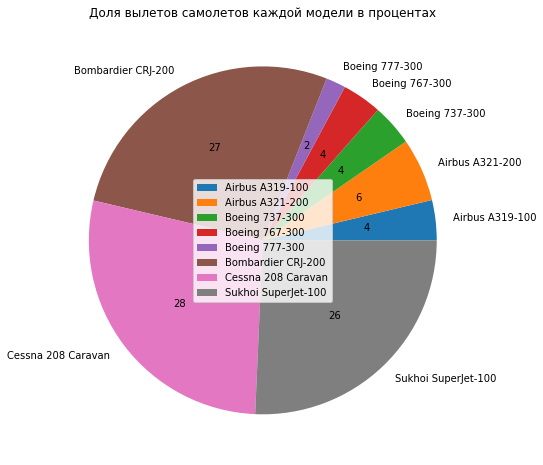

In [7]:
# Список названий для легенды
labels = [row for row in models_flights.model]
# График-пирог для визуализации доли вылетов, приходящейся на каждую модель самолета
ax = models_flights.plot(kind = 'pie', y = 'flights_amount', figsize = (8,8), labels = labels, autopct='%.f')
# Помещаем легенду в центр, чтобы не заслоняла числа и названия моделей
plt.legend(loc= 10)
ax.set_ylabel("")
plt.title('Доля вылетов самолетов каждой модели в процентах')
plt.show()

В сентябре 2018 по России больше всего летали самолетами моделей Cessna, Bombardier и Superjet. Суперджеты - это Аэрофлот, их много потому, что Аэрофлот самая крупная компания, они и летают туда, куда больше никто не летает. Бомбардир - маленький самолетик на 50 мест. Cessna - совсем крошечный на 9-13 пассажиров. То есть добрая половина рейсов - самолеты с малой вместимостью. Видимо, мало россияне летают внутри страны. Москвичи и петербуржцы, вероятно, больше заграницу ездят, а жители провинции почти никуда не ездят. Низкая мобильность.

### <font color = 'purple'> 4. Ежедневное количество рейсов по городам прибытия в августе 2018

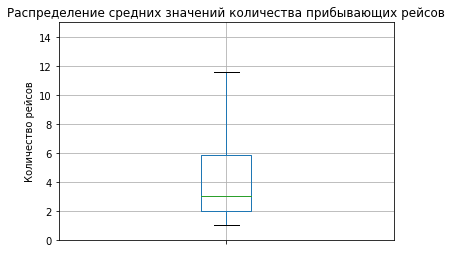

In [8]:
# Диаграмма размаха для количества рейсов по городам
ax = cities_flights.boxplot()
ax.set_xticklabels('')
ax.set_ylabel("Количество рейсов")
plt.ylim(0, 15)
plt.title('Распределение средних значений количества прибывающих рейсов')
plt.show()

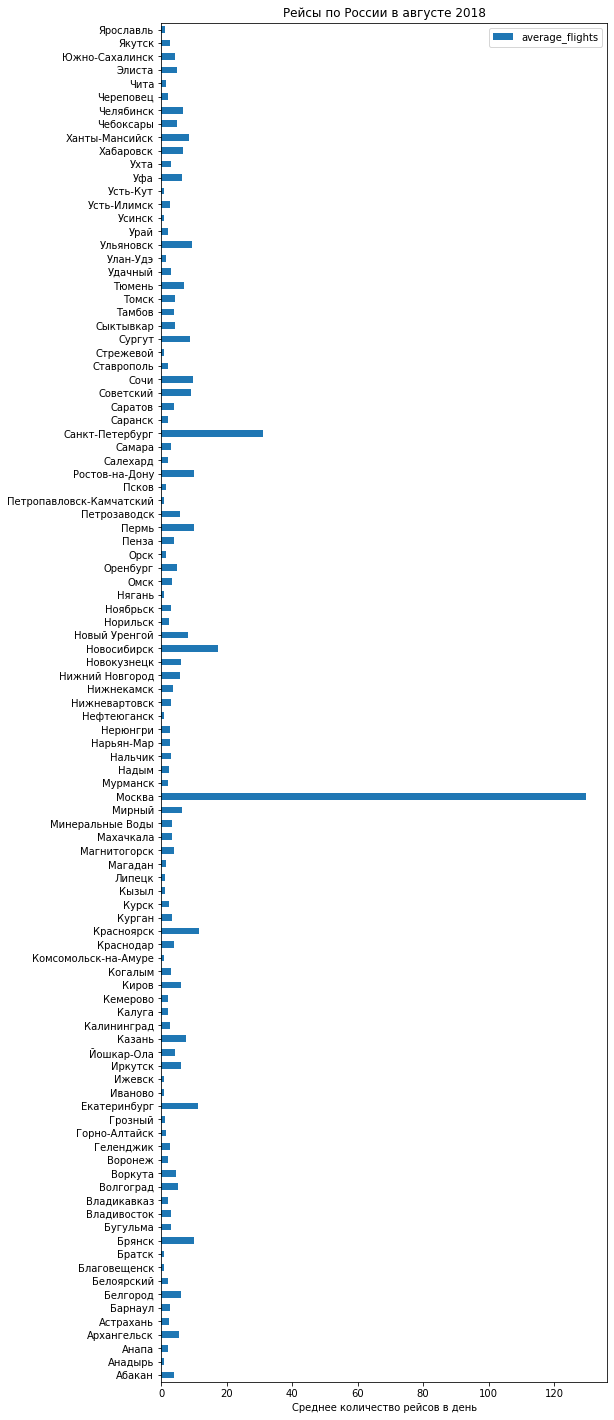

In [9]:
labels = [row for row in cities_flights.city]
ax = cities_flights.plot(kind='barh', figsize = (8,25))
ax.set_yticklabels(labels)
ax.set_xlabel("Среднее количество рейсов в день")
plt.title('Рейсы по России в августе 2018')
plt.show()

В 75% городов ежедневно в августе 2018 г. прибывало не более 6 рейсов. Медианное значение - 3 рейса. Казалось бы, пора отпусков. Может, люди боятся летать? Катастроф много. Или просто очень любят плацкартные вагоны. Так или иначе, летают в большинство городов очень мало. В основном, летят в Москву, Птербург и еще несколько крупных городов.

### <font color='purple'> 5. Топ-10 городов прибытия по количеству рейсов в августе 2018

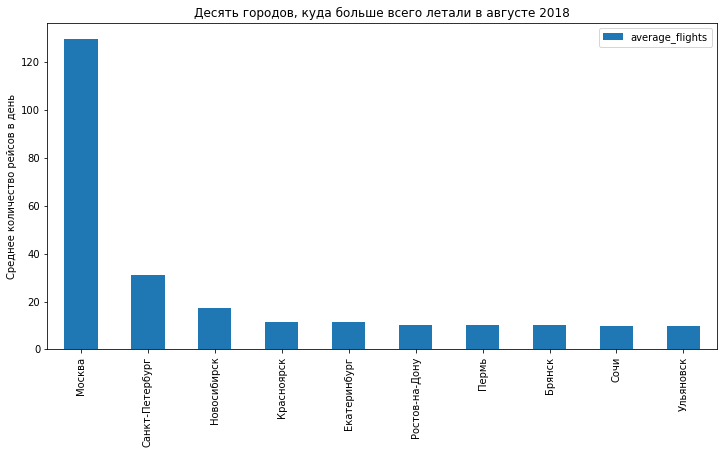

In [10]:
labels = [row for row in top_ten_cities.city]
ax = top_ten_cities.plot(kind = 'bar', figsize = (12,6))
ax.set_xticklabels(labels)
ax.set_ylabel("Среднее количество рейсов в день")
plt.title('Десять городов, куда больше всего летали в августе 2018')
plt.show()

Летают очень часто через Москву. Рейсов типа Пермь-Брянск (из провинциального города в другой провинциальный город), скорее всего, не очень много. Отчасти поэтому Москва как направление на первом месте с большим отрывом. В целом, в топ-10 ожидаемо вошли города-миллионники и Сочи (все-таки кто-то летает в отпуск). Возможно, зимой Сочи не попал бы в топ. Брянск и Ульяновск - это загадка. При этом в топ-10 нет Нижнего Новгорода. Очень большой город, казалось бы. Но наверно, слишком близко к Москве, чтобы лететь. Туда можно быстро доехать на поезде.